# 2011 Census Data

In [5]:
import pandas as pd
%matplotlib inline

## Task

Read the "microdata" csv file into a `pandas` dataframe.

* How many people does this data set contain?
* What information about them do we have about them?
* Are there any difficulties with using this data set?

In [7]:
data = pd.read_csv("2011 Census Microdata Teaching File.csv")
#data = pd.read_csv("2011 Census Nanodata Teaching File.csv")
Length = len(data)
median = data.quantile(0.5)
UQ = data.quantile(0.75)
LQ = data.quantile(0.25)
print("Ammount of values",Length)
print("median \n",median)
print("Upper Quartile \n",UQ)
print("Lower Quartile \n",LQ)

Ammount of values 569741
median 
 Person ID                    7679353.0
Family Composition                 2.0
Population Base                    1.0
Sex                                2.0
Age                                4.0
Marital Status                     2.0
Student                            2.0
Country of Birth                   1.0
Health                             2.0
Ethnic Group                       1.0
Religion                           2.0
Economic Activity                  1.0
Occupation                         3.0
Industry                           4.0
Hours worked per week             -9.0
Approximated Social Grade          2.0
Name: 0.5, dtype: float64
Upper Quartile 
 Person ID                    7821788.0
Family Composition                 3.0
Population Base                    1.0
Sex                                2.0
Age                                6.0
Marital Status                     2.0
Student                            2.0
Country of Birth          

In [4]:
data.tail(5)

Person ID     Region Residence Type  Family Composition  \
569736    7946020  W92000004              H                   1   
569737    7944310  W92000004              H                   3   
569738    7945374  W92000004              H                   3   
569739    7944768  W92000004              H                   1   
569740    7944959  W92000004              H                   2   

        Population Base  Sex  Age  Marital Status  Student  Country of Birth  \
569736                1    1    5               1        2                 1   
569737                1    1    3               1        2                 1   
569738                1    1    1               1        1                 1   
569739                1    2    8               5        2                 1   
569740                1    2    2               2        2                 1   

        Health  Ethnic Group  Religion  Economic Activity  Occupation  \
569736       4             1         9                  1           8   
569737       2             1         1                  1           7   
569738       1             1         2                 -9          -9   
569739       3             1         9                  5           9   
569740       2             1         1                  1           7   

        Industry  Hours worked per week  Approximated Social Grade  
569736         8                      3                          3  
569737         4                      3                          4  
569738        -9                     -9                         -9  
569739         2                     -9                          4  
569740         4                      1                          4

`data.Religion` works but `data.Marital Status` doesn't.

You'll need to use `data["Marital Status"]` instead.

## Task

* How many people in the sample live in London?

* What proportion of the sample are over 75 years old?

* How many of the students are in very good health?

In [28]:
print("individuals living in london:",len(data[data["Region"]=="E12000007"]))
print("individuals above the age of 75:",len(data[data["Age"]==8]))
print("students who are in good health:",data.loc[data["Students"]==1,"Health"].map(1).values_count())

individuals living in london: 83582
individuals above the age of 75: 43704


KeyError: 'Students'

## Tool

We can use `loc` and `value_counts()` to look more closely at student health.

## Tool

We can use `map` with a dictionary to make those variables easier to read.

In [32]:
health_codes = {1: "1. Very good health",
                2: "2. Good health",
                3: "3. Fair health",
                4: "4. Bad health",
                5: "5. Very bad health",
                -9: "No code required"}
data.loc[data["Student"]==1,"Health"].map(health_codes).value_counts()

1. Very good health    90038
2. Good health         25305
No code required        6804
3. Fair health          3433
4. Bad health            708
5. Very bad health       249
Name: Health, dtype: int64

## Task

> Londoners work more but are less healthy than the rest of the UK

Investigate.

In [51]:
hours = {1: "1. Part-time: 15 or less hours worked",
                2: "2. Part-time: 16 to 30 hours worked",
                3: "3. Full-time: 31 to 48 hours worked",
                4: "4. Full-time: 49 or more hours worked"}
def Replace(X,Y,list):
    list = [Y if item == X else item for item in range(len(list))]
    return list

In [39]:
WorkHoursLondon =[data["Region"] == "E12000007", "Hours worked per week"] #Count of values of hours worked per week in London
HealthLondon = [data["Region"] == "E12000007", "Health"] #Count of values of health in London

In [66]:
WorkHoursNotLondon = data.loc[(data["Region"] != "E12000007") & (data["Hours worked per week"] != -9),"Hours worked per week"] #Count of values of hours worked per week outside of London
HealthNotLondon = data.loc[(data["Region"] != "E12000007") & (data["Health"] != -9), "Health"] #Count of values of health outside of London

In [67]:
print("NLWH:",WorkHoursNotLondon)
print("NLH:",HealthNotLondon)

NLWH: 1         4
2         3
3         3
4         3
5         3
6         2
10        3
12        3
14        2
16        4
18        3
21        1
22        3
25        3
26        3
28        1
29        3
30        2
31        2
37        3
38        1
43        3
44        3
46        2
47        3
49        3
50        3
52        2
55        4
56        3
         ..
569640    4
569662    1
569664    1
569665    1
569682    3
569683    3
569685    3
569689    3
569690    3
569691    4
569693    2
569694    4
569697    3
569698    2
569699    3
569701    2
569703    3
569706    3
569713    3
569715    3
569717    2
569721    3
569725    3
569728    3
569733    2
569734    2
569735    3
569736    3
569737    3
569740    1
Name: Hours worked per week, Length: 226815, dtype: int64
NLH: 0         2
1         1
2         1
3         2
4         1
5         2
6         2
7         2
8         1
9         3
10        3
11        1
12        1
13        2
14        2
15        2
16     

## Tool

> Is there a relationship between social class and health?

It doesn't make sense to draw a scatter graph between two categorical variables.

We'll use `pandas` `crosstab` instead.

In [44]:
social_codes = {1: 'AB', 2: 'C1', 3: 'C2', 4: 'DE', -9: 'None required'}
pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes))

Health                     1. Very good health  2. Good health  \
Approximated Social Grade                                        
AB                                       40943           30625   
C1                                       74072           59075   
C2                                       28581           32335   
DE                                       33513           47251   
None required                            87862           22458   

Health                     3. Fair health  4. Bad health  5. Very bad health  \
Approximated Social Grade                                                      
AB                                   8222           2002                 528   
C1                                  19461           5597                1437   
C2                                  13382           4374                1264   
DE                                  28682          10998                3296   
None required                        4733           1587                 659   

Health                     No code required  
Approximated Social Grade                    
AB                                        0  
C1                                        0  
C2                                        0  
DE                                        0  
None required                          6804

In [45]:
pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes), normalize="index")

Health                     1. Very good health  2. Good health  \
Approximated Social Grade                                        
AB                                    0.497364        0.372024   
C1                                    0.463988        0.370047   
C2                                    0.357549        0.404511   
DE                                    0.270834        0.381857   
None required                         0.707976        0.180963   

Health                     3. Fair health  4. Bad health  5. Very bad health  \
Approximated Social Grade                                                      
AB                               0.099879       0.024320            0.006414   
C1                               0.121904       0.035060            0.009001   
C2                               0.167409       0.054719            0.015813   
DE                               0.231792       0.088880            0.026636   
None required                    0.038138       0.012788            0.005310   

Health                     No code required  
Approximated Social Grade                    
AB                                 0.000000  
C1                                 0.000000  
C2                                 0.000000  
DE                                 0.000000  
None required                      0.054825

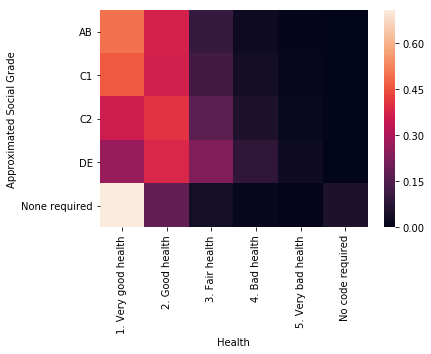

In [46]:
import seaborn
seaborn.heatmap(pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes), normalize="index"))

## Task

In what part of the UK is unemployment worst?